In [82]:
import pandas as pd
import numpy as np

In [83]:
df = pd.read_csv("/content/registros_medicos_irregulares.csv")

**Fase 1. Exploracion de Datos**

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12040 entries, 0 to 12039
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              12040 non-null  int64  
 1   edad            11975 non-null  float64
 2   género          9668 non-null   object 
 3   altura_cm       12040 non-null  float64
 4   peso_kg         11970 non-null  float64
 5   fuma            11474 non-null  object 
 6   fecha_encuesta  12040 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 658.6+ KB


In [85]:
df.shape

(12040, 7)

In [86]:
df.head()

,id,edad,género,altura_cm,peso_kg,fuma,fecha_encuesta
0,1,52.0,Masculino,159.102636,73.096499,No,29-Dec-22
1,2,21.0,NaN,178.320405,72.281298,Ocasional,31-May-23
2,3,82.0,f,172.629309,76.237815,No,23-Oct-22
3,4,35.0,Hombre,170.004329,51.142580,Sí,07/23/2022
4,5,35.0,NaN,182.902295,59.204973,No,01-Jan-22


In [87]:
df.describe()

,id,edad,altura_cm,peso_kg
count,12040.000000,11975.000000,12040.000000,11970.000000
mean,5997.883472,51.097035,170.150331,70.092944
std,3462.848424,19.412387,33.378144,15.247014
min,1.000000,1.000000,-179.937108,11.820230
25%,2998.750000,34.000000,163.193295,59.995252
50%,5997.500000,51.000000,170.094549,70.061470
75%,8995.250000,68.000000,176.740532,80.208699
max,12000.000000,155.000000,1675.764624,190.113117


In [88]:
df.describe(include=['object'])

,género,fuma,fecha_encuesta
count,9668,11474,12040
unique,8,6,2184
top,F,No,2023-10-31
freq,1259,6021,14


In [89]:
df.isnull().sum()

,0
id,0
edad,65
género,2372
altura_cm,0
peso_kg,70
fuma,566
fecha_encuesta,0


In [90]:
df.duplicated().sum()

np.int64(40)

In [91]:
df['género'].value_counts(dropna=False)

,count
género,
NaN,2372
F,1259
Masculino,1251
M,1215
Hombre,1202
Femenino,1200
Mujer,1182
f,1180
m,1179


In [92]:
df['fuma'].value_counts(dropna=False)

,count
fuma,
No,6021
Sí,2422
Ocasional,1201
S,624
no,620
si,586
NaN,566


In [93]:
print("\n--- Errores en 'altura_cm' ---")
errores_altura = df[(df['altura_cm'] < 100) | (df['altura_cm'] > 220)]
print(errores_altura[['altura_cm']].head()) # Mostramos solo algunos

print("\n--- Posibles errores de unidad en 'peso_kg' (valores > 150) ---")
errores_peso = df[df['peso_kg'] > 150]
print(errores_peso[['peso_kg']].head())

print("\n--- Outliers evidentes en 'edad' ---")
errores_edad = df[(df['edad'] < 18) | (df['edad'] > 100)]
print(errores_edad[['edad']].head())


--- Errores en 'altura_cm' ---
        altura_cm
12       0.000000
1748  -151.854884
2497  -165.914658
2555  1637.943974
3300  -157.633309

--- Posibles errores de unidad en 'peso_kg' (valores > 150) ---
         peso_kg
194   170.123082
2620  190.113117
3343  176.908070
3727  163.982744
8240  180.413307

--- Outliers evidentes en 'edad' ---
        edad
1025   155.0
4925     1.0
8012   120.0
10381    2.0


**Fase 2. Limpieza de Datos**

In [94]:
print("Valores originales en 'género':")
print(df['género'].value_counts(dropna=False))

mapa_genero = {
    "M": "Masculino", "m": "Masculino", "Hombre": "Masculino",
    "F": "Femenino", "f": "Femenino", "Mujer": "Femenino", "Femenino": "Femenino",
    "": np.nan
}
df['género'] = df['género'].replace(mapa_genero)

Valores originales en 'género':
género
NaN          2372
F            1259
Masculino    1251
M            1215
Hombre       1202
Femenino     1200
Mujer        1182
f            1180
m            1179
Name: count, dtype: int64


In [95]:
df['género'].value_counts(dropna=False)

,count
género,
Masculino,4847
Femenino,4821
NaN,2372


In [96]:
print("Valores originales en 'fuma':")
print(df['fuma'].value_counts(dropna=False))

mapa_fuma = {
    "si": "Sí", "S": "Sí",
    "no": "No"
}
df['fuma'] = df['fuma'].replace(mapa_fuma)

Valores originales en 'fuma':
fuma
No           6021
Sí           2422
Ocasional    1201
S             624
no            620
si            586
NaN           566
Name: count, dtype: int64


In [97]:
df['fuma'].value_counts(dropna=False)

,count
fuma,
No,6641
Sí,3632
Ocasional,1201
NaN,566


In [98]:
df['fecha_encuesta'] = pd.to_datetime(df['fecha_encuesta'], format='mixed', errors='coerce')
df['fecha_encuesta'].dtype

dtype('<M8[ns]')

In [99]:
df['altura_cm'] = df['altura_cm'].abs()
df.loc[df['altura_cm'] > 250, 'altura_cm'] = df['altura_cm'] / 10
print("Descripción de 'altura_cm' después de corrección:")
print(df['altura_cm'].describe())
print("-" * 30)

Descripción de 'altura_cm' después de corrección:
count    12040.000000
mean       169.877592
std         10.972659
min          0.000000
25%        163.217442
50%        170.095996
75%        176.733788
max        208.019571
Name: altura_cm, dtype: float64
------------------------------


In [100]:
df.loc[df['peso_kg'] > 150, 'peso_kg'] = df['peso_kg'] / 2.20462
print("Descripción de 'peso_kg' después de corrección:")
print(df['peso_kg'].describe())
print("-" * 30)


Descripción de 'peso_kg' después de corrección:
count    11970.000000
mean        70.036935
std         15.033678
min         11.820230
25%         59.995252
50%         70.061470
75%         80.196894
max        143.502145
Name: peso_kg, dtype: float64
------------------------------


In [101]:
df.loc[(df['edad'] < 18) | (df['edad'] > 100), 'edad'] = np.nan
print("Descripción de 'edad' después de corrección:")
print(df['edad'].describe())
print("-" * 30)

Descripción de 'edad' después de corrección:
count    11971.000000
mean        51.090886
std         19.371553
min         18.000000
25%         34.000000
50%         51.000000
75%         68.000000
max         99.000000
Name: edad, dtype: float64
------------------------------


In [102]:
df.head()

,id,edad,género,altura_cm,peso_kg,fuma,fecha_encuesta
0,1,52.0,Masculino,159.102636,73.096499,No,2022-12-29
1,2,21.0,NaN,178.320405,72.281298,Ocasional,2023-05-31
2,3,82.0,Femenino,172.629309,76.237815,No,2022-10-23
3,4,35.0,Masculino,170.004329,51.142580,Sí,2022-07-23
4,5,35.0,NaN,182.902295,59.204973,No,2022-01-01


In [103]:
num_duplicados_id = df.duplicated(subset=['id']).sum()
print(f"Número de registros duplicados basados en la columna 'id': {num_duplicados_id}\n")

df.drop_duplicates(subset=['id'], keep='first', inplace=True)

print(f"Se han eliminado {num_duplicados_id} filas duplicadas.")
print(f"El DataFrame ahora tiene {df.shape[0]} filas.")

print(f"Número de duplicados de 'id' después de la limpieza: {df.duplicated(subset=['id']).sum()}")

Número de registros duplicados basados en la columna 'id': 40

Se han eliminado 40 filas duplicadas.
El DataFrame ahora tiene 12000 filas.
Número de duplicados de 'id' después de la limpieza: 0


In [104]:
df[['edad', 'peso_kg']].isnull().sum()

,0
edad,69
peso_kg,70


In [105]:
mediana_edad = df['edad'].median()
mediana_peso = df['peso_kg'].median()

In [106]:
print(f"\nMediana de edad a usar: {mediana_edad:.2f}")
print(f"Mediana de peso a usar: {mediana_peso:.2f}\n")



Mediana de edad a usar: 51.00
Mediana de peso a usar: 70.06



In [107]:
df.fillna({'edad': mediana_edad, 'peso_kg': mediana_peso}, inplace=True)

print("--- Valores Faltantes DESPUÉS (Numéricos) ---")
print(df[['edad', 'peso_kg']].isnull().sum())

--- Valores Faltantes DESPUÉS (Numéricos) ---
edad       0
peso_kg    0
dtype: int64


In [108]:
df[['género', 'fuma']].isnull().sum()

,0
género,2362
fuma,564


In [109]:
moda_genero = df['género'].mode()[0]
moda_fuma = df['fuma'].mode()[0]

print(f"\nModa de género a usar: '{moda_genero}'")
print(f"Moda de fuma a usar: '{moda_fuma}'\n")


Moda de género a usar: 'Masculino'
Moda de fuma a usar: 'No'



In [110]:
df.fillna({'género': moda_genero, 'fuma': moda_fuma}, inplace=True)

# Verificar que ya no hay faltantes
print("--- Valores Faltantes DESPUÉS (Categóricos) ---")
print(df[['género', 'fuma']].isnull().sum())

--- Valores Faltantes DESPUÉS (Categóricos) ---
género    0
fuma      0
dtype: int64


**Paso 3. Feature Engineering**

In [111]:
sns.set_theme(style="whitegrid")


altura_m = df['altura_cm'] / 100

df['IMC'] = df['peso_kg'] / (altura_m ** 2)

print("--- Columna de IMC calculada y añadida ---")
print(df[['altura_cm', 'peso_kg', 'IMC']].head())

--- Columna de IMC calculada y añadida ---
    altura_cm    peso_kg        IMC
0  159.102636  73.096499  28.876319
1  178.320405  72.281298  22.731278
2  172.629309  76.237815  25.582406
3  170.004329  51.142580  17.695493
4  182.902295  59.204973  17.697824


In [112]:
bins = [17, 30, 60, np.inf]

labels = ["Joven Adulto (18-30)", "Adulto (31-60)", "Adulto Mayor (>60)"]

In [113]:
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=True)

In [114]:
df[['edad', 'grupo_edad']].head(10)

,edad,grupo_edad
0,52.0,Adulto (31-60)
1,21.0,Joven Adulto (18-30)
2,82.0,Adulto Mayor (>60)
3,35.0,Adulto (31-60)
4,35.0,Adulto (31-60)
5,19.0,Joven Adulto (18-30)
6,22.0,Joven Adulto (18-30)
7,29.0,Joven Adulto (18-30)
8,33.0,Adulto (31-60)
9,36.0,Adulto (31-60)


In [115]:
df['grupo_edad'].value_counts()

,count
grupo_edad,
Adulto (31-60),5387
Adulto Mayor (>60),4280
Joven Adulto (18-30),2333


**Fase 4. Análisis Descriptivo y Visualización**

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

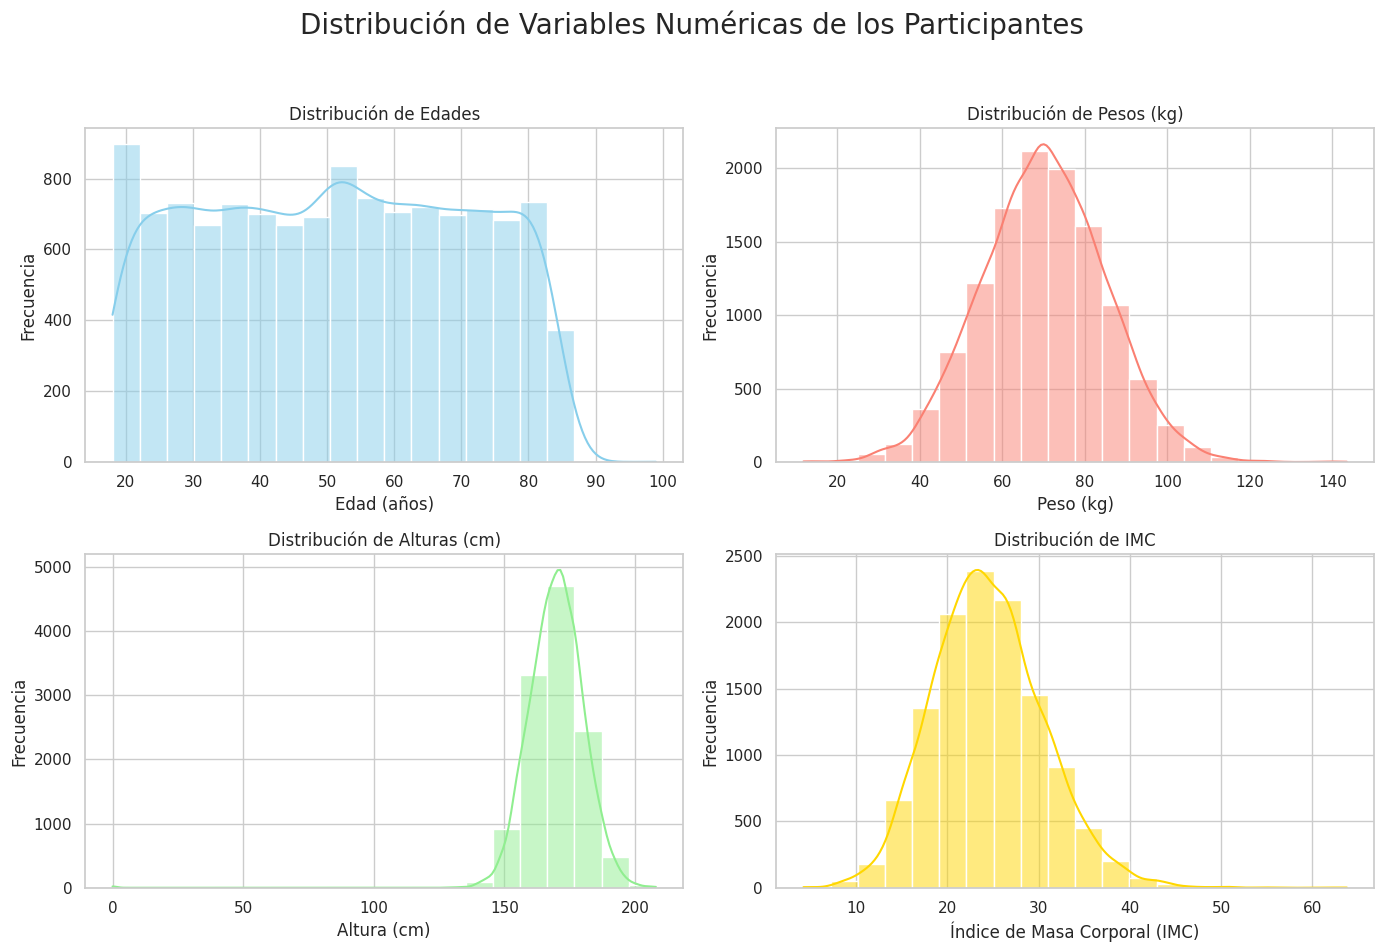

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribución de Variables Numéricas de los Participantes', fontsize=20)

# Histograma para Edad
sns.histplot(df['edad'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de Edades')
axes[0, 0].set_xlabel('Edad (años)')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma para Peso
sns.histplot(df['peso_kg'], bins=20, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribución de Pesos (kg)')
axes[0, 1].set_xlabel('Peso (kg)')
axes[0, 1].set_ylabel('Frecuencia')

# Histograma para Altura
sns.histplot(df['altura_cm'], bins=20, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribución de Alturas (cm)')
axes[1, 0].set_xlabel('Altura (cm)')
axes[1, 0].set_ylabel('Frecuencia')

# Histograma para IMC
sns.histplot(df['IMC'], bins=20, kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribución de IMC')
axes[1, 1].set_xlabel('Índice de Masa Corporal (IMC)')
axes[1, 1].set_ylabel('Frecuencia')

# Ajustamos el layout para que no se superpongan los títulos y lo mostramos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

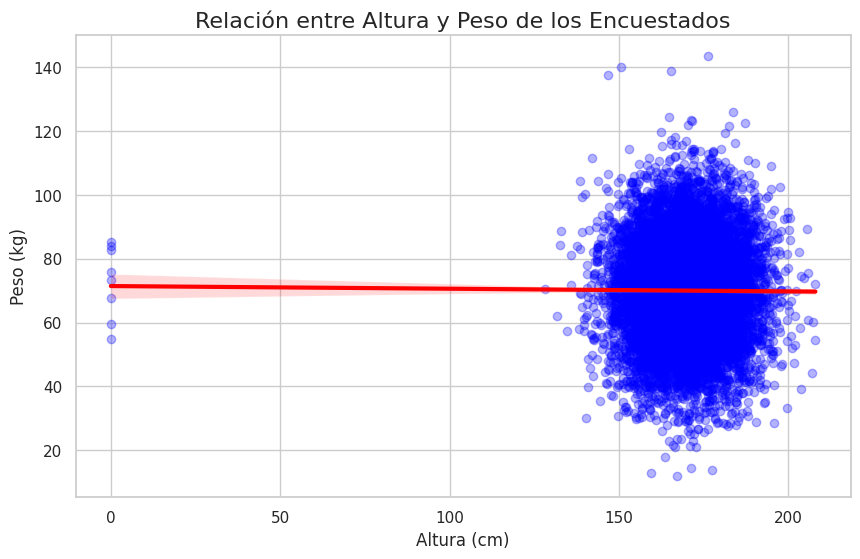

In [119]:

# Usamos regplot de seaborn para crear un scatter plot con una línea de regresión
sns.regplot(data=df, x='altura_cm', y='peso_kg',
            scatter_kws={'alpha':0.3, 'color':'blue'}, # Estilo de los puntos
            line_kws={'color':'red', 'linewidth':3})   # Estilo de la línea

# Añadimos títulos y etiquetas para mayor claridad
plt.title('Relación entre Altura y Peso de los Encuestados', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)

# Mostramos el gráfico
plt.show()

/tmp/ipython-input-3429583612.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporciones = df.groupby('grupo_edad')['fuma'].value_counts(normalize=True).unstack()


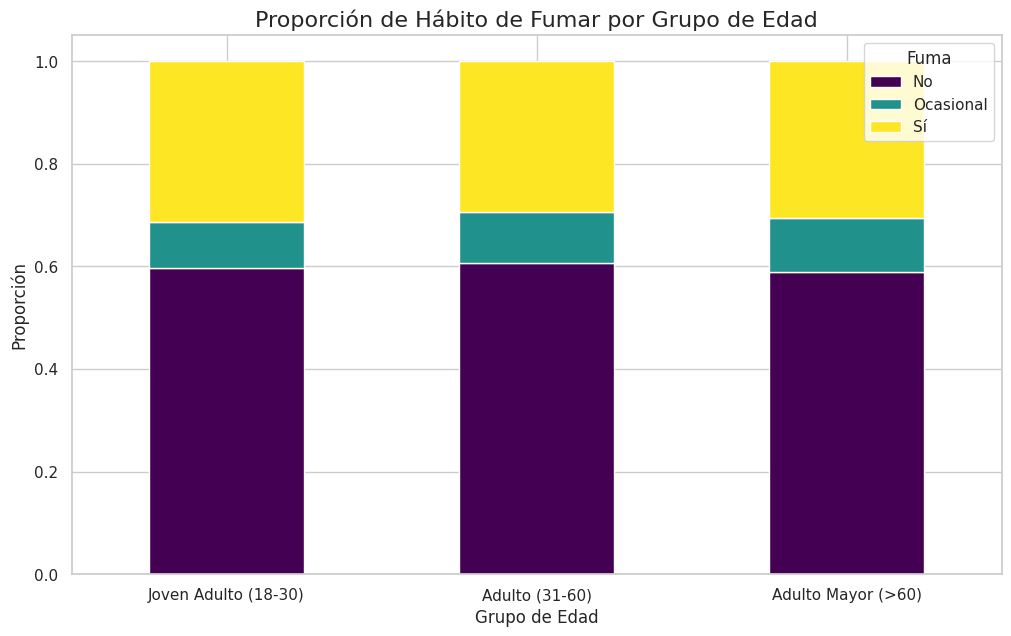

In [120]:

# Agrupamos por 'grupo_edad' y obtenemos el porcentaje de cada categoría en 'fuma'
proporciones = df.groupby('grupo_edad')['fuma'].value_counts(normalize=True).unstack()

# 2. Creamos el gráfico de barras apilado
proporciones.plot(kind='bar', stacked=True, figsize=(12, 7),
                  colormap='viridis', rot=0)

# 3. Añadimos títulos y etiquetas
plt.title('Proporción de Hábito de Fumar por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.legend(title='Fuma')

# Mostramos el gráfico
plt.show()